#  Feature Selection-Information gain - mutual information In Classification Problem Statements

https://www.youtube.com/watch?v=81JSbXZ26Ls&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=3

https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/3-%20Information%20gain%20-%20mutual%20information%20In%20Classification.ipynb

## Mutual Information

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) -  between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort -

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

### Note:

Whenever we solve a machine learning problem, second important step is feature selection after feature engineering(removing null values, encoding etc..). In feature selection we compare our independent features with dependent features. During this process, we apply statistical test like chi2 test, anova test, mutual information test.

#### EDA:
  1. FEATURE ENGINEERING
  2. FEATURE SELECTION


## 1. Load libraries & dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df['Wine'].unique()

array([1, 2, 3])

## 2. Dependent and Indepdenent variables

In [5]:
X = df.drop(['Wine'], axis=1) # independent features
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
y = df[['Wine']] # Dependent variable
y.head()

,Wine
0,1
1,1
2,1
3,1
4,1


## 3. Train Test Split the dataset to avoid overfitting

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [9]:
X_train.shape

(124, 13)

In [10]:
X_test.shape

(54, 13)

In [11]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


## 4. Feature selection with mutual info classifier



In [12]:
from sklearn.feature_selection import mutual_info_classif

In [13]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.42227492, 0.30096985, 0.1658083 , 0.23738629, 0.18160142,
       0.48243218, 0.71719305, 0.13672703, 0.25883632, 0.61534985,
       0.55287585, 0.54923085, 0.53113006])

**Inference:**

We never get a negativer value when we apply mutual info classifier on trainin dataset. Either get 0 or 1. if value is nearer to 1 or higher than others, then that feature is best feature or most important feature in the training dataset. Above case, highest value is 0.71. We want to find which features does this arrau values represent.

## 5. Convert array to series and set index.

In [14]:
mutual_info_data = pd.Series(mutual_info)
mutual_info_data

0     0.422275
1     0.300970
2     0.165808
3     0.237386
4     0.181601
5     0.482432
6     0.717193
7     0.136727
8     0.258836
9     0.615350
10    0.552876
11    0.549231
12    0.531130
dtype: float64

In [15]:
mutual_info_data.index = X_train.columns

In [16]:
mutual_info_data

Alcohol                 0.422275
Malic.acid              0.300970
Ash                     0.165808
Acl                     0.237386
Mg                      0.181601
Phenols                 0.482432
Flavanoids              0.717193
Nonflavanoid.phenols    0.136727
Proanth                 0.258836
Color.int               0.615350
Hue                     0.552876
OD                      0.549231
Proline                 0.531130
dtype: float64

## 6. Find top 10 most important features

In [18]:
mutual_info_data.sort_values(ascending=False)

Flavanoids              0.717193
Color.int               0.615350
Hue                     0.552876
OD                      0.549231
Proline                 0.531130
Phenols                 0.482432
Alcohol                 0.422275
Malic.acid              0.300970
Proanth                 0.258836
Acl                     0.237386
Mg                      0.181601
Ash                     0.165808
Nonflavanoid.phenols    0.136727
dtype: float64

**Inference:**

Here feature `Flavanoids` is the most important one. Here we select the top 10 features.

## 7. Plot the ordered mutual inforamation values per feature using barplot.

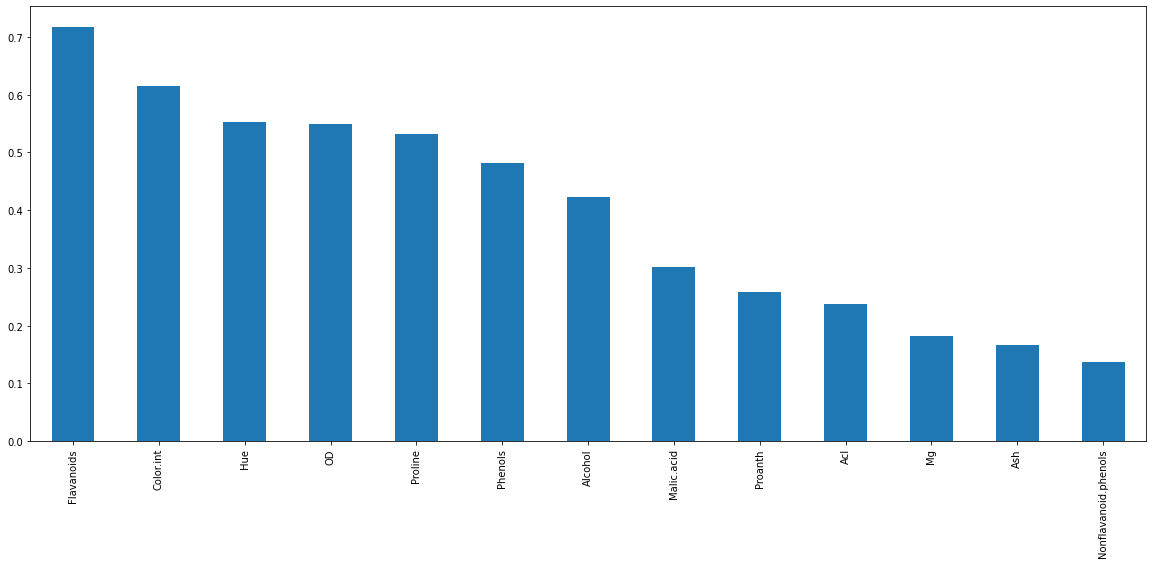

In [23]:
mutual_info_data.sort_values(ascending=False).plot.bar(figsize=(20,8))

**Inference**

We can see `Flavaniods` features has the highest bar.

## 8. Select top 5 important features

In [24]:
from sklearn.feature_selection import SelectKBest

In [34]:
# Pass mutual_info_classif function and k value as argument to SelectKBest()
select_five_cols = SelectKBest(mutual_info_classif, k=5)
select_five_cols

SelectKBest(k=5, score_func=<function mutual_info_classif at 0x7ffb1f6b7830>)

In [35]:
select_five_cols.fit(X_train, y_train)
X_train.columns[select_five_cols.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

**Inference:**

Using, `mutual information classfier` technique, we selected top 5 feagtures from training data those are most important.

['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'] are the selected features.

### Difference Between Information Gain And Mutual Information

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.